In [1]:
%pylab inline
from scipy.ndimage.interpolation import shift
from scipy.signal import correlate
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Assignment_1, Exercise 2

The goal of this assignment is to compensate the shift for the following set of 10 signals.

There are four tasks to achieve that are described in detail below.

# LOAD THE DATA

(10, 599)


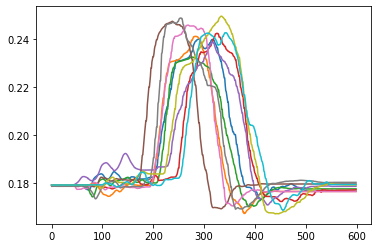

In [2]:
#List to store demonstraitons
Signals=[]

#Signal Index
file_id=[0,1,2,3,4,5,6,7,8,9]
filename = './Signals/signal_'
              
N=599
time = np.linspace(0, N, num=N)
#Open each file
for f_id in file_id:
    #List to store temporaly the data of each file
    Dem_i=[]
    #Concatenate file name to be opened
    file_name=filename+str(f_id)+'.txt'
    data = np.loadtxt(file_name, delimiter=' ', skiprows=1, dtype=str)
    Signals.append(np.asarray(data)[:,2].transpose())
Signals=np.asarray(Signals).astype(np.float32)

# Plots
fig = plt.figure(1)
for i in range(Signals.shape[0]):
    plt.plot(time,Signals[i,:])
print(Signals.shape)

## Task_1

Implement your own cross-correlation function to get the correlation vector using the formula we have seen in class:

$z[k]=(x*y)(k-N+1)=\sum_{l=0}^{\left \| x \right \||}x_ly_{l-k+N-1}$
    
   <em>You can find the original formula of the correlate function in this link:</em>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html




In [95]:

#Implement your code here

def Correlation(signal_1,signal_2):
    N = max(len(signal_1), len(signal_2))
    ks = np.arange(0, len(signal_1) + len(signal_2) - 2)
    z=[]
    for k in ks:
        z.append(np.sum(signal_1 * shift(signal_2, k-N+1 , cval=0.0)))
    return z





## Task_2

Get the shift values between the signals using your implemented correlation function. You should get 9 shift values. Use the singal_0 as a reference.



In [96]:


Signal_Reference=Signals[0,:]
shift_values=[]
for i in [1,2,3,4,5,6,7,8,9]:
    #Implement your code here
    refSig = Signals[0,:]
    shift_values.append(np.argmax(Correlation(refSig, Signals[i,:])))

print(shift_values)

[598, 598, 598, 598, 598, 598, 598, 598, 598]


## Task_3
As you might have seen already, the shift value is always 0. In practice, this is actually not true. For example, you can clearly see an offset in the following plot, corresponding to the signals  5 and 9 in the component “Y”.

Why is this happening?
Elaborate an explanation about this and include it in your report and **propose a solution**

(10, 599)
(599,)


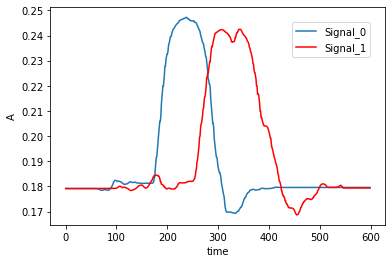

In [5]:
print(Signals.shape)
print(time.shape)
x = Signals[5,:]
plt.plot(time,x,label="Signal_0")
y = Signals[9,:]
plt.plot(time,y,'r',label="Signal_1")
plt.xlabel('time')
plt.ylabel('A')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc=1, borderaxespad=1.5)


### Answer

In out case we have a shift of 598 which is the same as having a value 0 (in this case), since we just get the last index rather than the first. 

The Cross Correlation assumes both signals have a DC offset of 0. In our case the DC component is of amplitude ~0.2 and the AC component is of amplitude ~0.08. This effect can be resolved by setting the DC component to 0 before we compute the XCorrelation. 

# Exercise 4:
Implement your solution from task 3 to align all the signals by compensating the Shift between them using the signal_0 as reference.
- Use your own Correlation function implemented in task 1.
- Plot the aligned signals

[616, 603, 566, 577, 651, 618, 619, 573, 558]


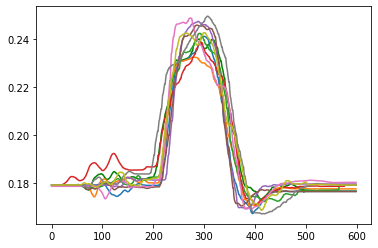

In [92]:
Signal_Reference=Signals[0,:]
plt.plot(time,Signal_Reference,'g')
shift_values=[]
for i in [1,2,3,4,5,6,7,8,9]:
    #Implement your code here
    avg1 = np.mean(Signal_Reference)
    avg2 = np.mean(Signals[i,:])
    corr = Correlation(Signal_Reference - avg1, Signals[i,:] - avg2)
    sh_val = np.argmax(corr)
    shift_values.append(sh_val)
    plt.plot(time, shift(Signals[i,:], sh_val - len(Signal_Reference) - 1, cval=Signals[i,0]))  

print(shift_values)

